In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape

(18, 3)

In [ ]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]])
Y.shape

(18, 1)

In [ ]:
# label = np.array([['g'],
#                   ['r'],
#                   ['b'],
#                   ['b'],
#                   ['b'],
#                   ['b']])

label = ['green', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
len(label)

18

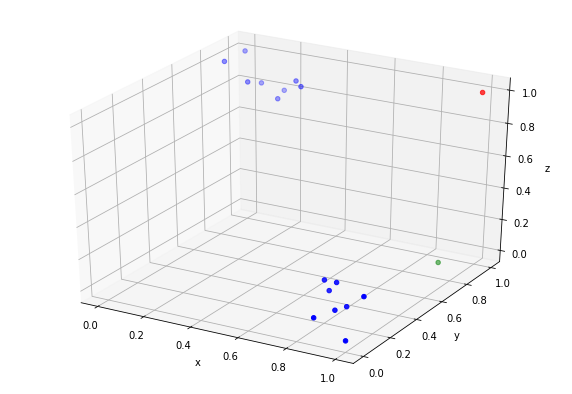

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2] ,c=label)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show();

In [ ]:
class LVQ:

  def __init__(self, epochs, alpha):
    self.epochs = epochs
    self.alpha = alpha

  def get_winner(self, x, prototypes):
    euc_distance = np.sum(np.power((x - prototypes), 2), axis=1)
    # print('Euc: ', euc_distance)
    winner_index = np.argmin(euc_distance)
    # print('Winner', winner_index)
    return winner_index


  def update_winner(self, x, y, winner, winner_label):
    if y == winner_label:
      winner = winner + self.alpha * (x - winner)
    else:
      winner = winner - self.alpha * (x - winner)
    return winner

  def train(self, samples_input, samples_output):

    prototypes = samples_input[:2, :]
    prototypes_label = samples_output[:2, :]
    # print(prototypes)

    x_train = samples_input[2:, :]
    y_train = samples_output[2:, :]

    for epoch in range(self.epochs):
      for x, y in zip(x_train, y_train):

        winner_index = self.get_winner(x, prototypes)
        winner = prototypes[winner_index]
        winner_label = prototypes_label[winner_index]

        prototypes[winner_index] = self.update_winner(x, y, winner, winner_label)

        # print(x)
    
    return samples_input, prototypes, prototypes_label

    


  def test(self, x_test, prototypes, prototypes_label):
    
    prediction = np.zeros(x_test.shape[0])
    for index, x in enumerate(x_test):
        winner_index = self.get_winner(x, prototypes)
        winner = prototypes[winner_index]
        winner_label = prototypes_label[winner_index]
        prediction[index] = winner_label

    return prediction



In [ ]:
lvq = LVQ(10, 0.03)
s, p, p_label = lvq.train(X, Y)

In [ ]:
s

array([[0.906736  , 0.17429631, 0.12845221],
       [0.2141146 , 0.93085286, 0.90386165],
       [0.25      , 0.95      , 0.9       ],
       [0.1       , 0.95      , 0.85      ],
       [0.87      , 0.        , 0.1       ],
       [0.82      , 0.2       , 0.14      ],
       [0.8       , 0.2       , 0.2       ],
       [0.        , 0.85      , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.17      , 1.        , 0.8       ],
       [0.9       , 0.1       , 0.1       ],
       [0.85      , 0.2       , 0.2       ],
       [0.2       , 0.9       , 0.8       ],
       [0.3       , 0.9       , 0.9       ],
       [0.        , 1.        , 1.        ],
       [0.1       , 0.85      , 0.9       ],
       [0.92      , 0.15      , 0.1       ],
       [1.        , 0.13      , 0.2       ]])

In [ ]:
p

array([[0.906736  , 0.17429631, 0.12845221],
       [0.2141146 , 0.93085286, 0.90386165]])

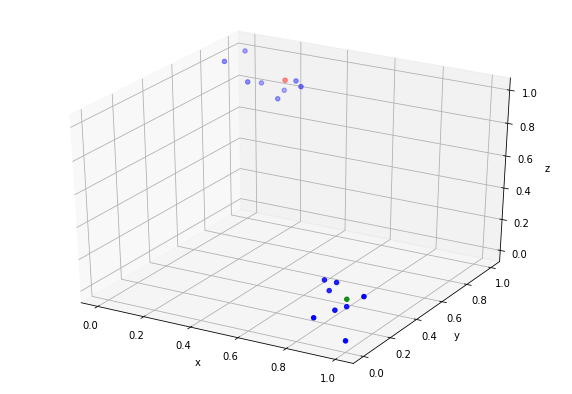

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(s[:,0], s[:,1], s[:,2] ,c=label)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show();

In [ ]:
x_test = np.array([[0.19, 0.93, 0.88]])
predicted = lvq.test(x_test, p, p_label)
predicted

array([1.])